In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
# import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn


In [3]:
# dataset
disease_df = pd.read_csv("framingham.csv")


In [9]:
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [12]:
disease_df['prevalentHyp'].count()

4238

In [13]:
disease_df.drop(['education'], inplace = True, axis = 1)

In [14]:
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)


In [15]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

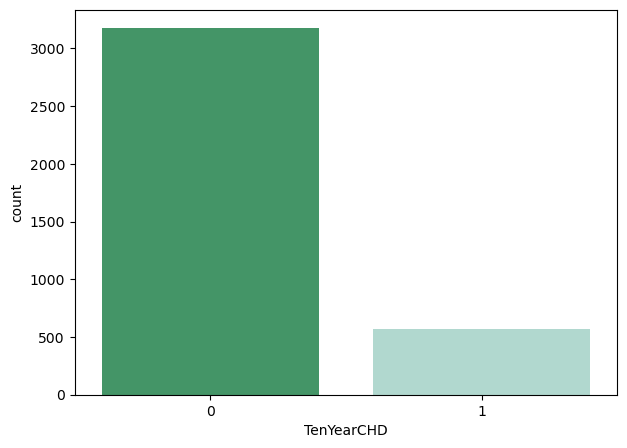

In [16]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sn.countplot(x='TenYearCHD', data=disease_df,
			palette="BuGn_r")
plt.show()


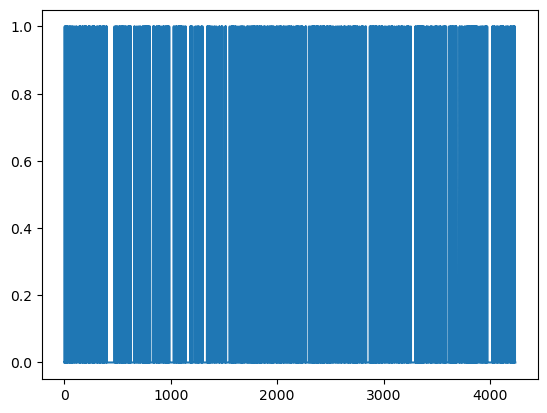

In [17]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)


In [19]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 
						'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X, 77777)
# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
		X, y, test_size = 0.3, random_state = 4)


print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)


[[-1.2346638   1.11635803 -0.75542723 -0.94055126 -1.19578906 -0.20444626]
 [-0.41768745 -0.89576997 -0.75542723  0.2925091  -0.51548639 -0.24631379]
 [-0.18426563  1.11635803  0.92230547  0.18041271 -0.22068857 -0.49751902]
 ...
 [ 0.04915618  1.11635803 -0.67154059  1.7049237   2.11501727  0.17236158]
 [ 0.16586709  1.11635803  2.85169808 -0.67151991 -0.26604208 -0.5812541 ]
 [ 0.282578   -0.89576997 -0.75542723  0.71847541  0.0514325   1.05157988]] 77777
Train set: (2624, 6) (2624,)
Test set: (1125, 6) (1125,)


In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [32]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
acc

0.8488888888888889

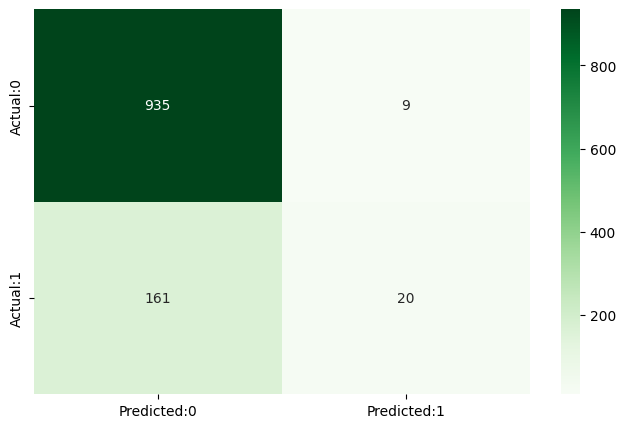

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       944
           1       0.69      0.11      0.19       181

    accuracy                           0.85      1125
   macro avg       0.77      0.55      0.55      1125
weighted avg       0.83      0.85      0.80      1125



In [29]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
						columns = ['Predicted:0', 'Predicted:1'], 
						index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

# This code is contributed by parna_28


In [15]:
logreg.classes_

array([0, 1], dtype=int64)

In [16]:
logreg.intercept_

array([-1.99643938])

In [17]:
logreg.coef_

array([[0.54356457, 0.26873495, 0.27725007, 0.13939901, 0.3655575 ,
        0.19514054]])

In [20]:
logreg.predict_proba(X_test)

array([[0.92553983, 0.07446017],
       [0.93955597, 0.06044403],
       [0.97861573, 0.02138427],
       ...,
       [0.94483791, 0.05516209],
       [0.58197765, 0.41802235],
       [0.61453087, 0.38546913]])